# 911 Calls 

The data is from [Kaggle](https://www.kaggle.com/mchirico/montcoalert), containing information of 911 calls (Fire, Traffic, EMS) for Montgomery County, PA.

The data contains the following fields:

* lat : Latitude
* lng: Longitude
* desc: Description of the Emergency Call
* zip: Zipcode
* title: Title
* timeStamp: YYYY-MM-DD HH:MM:SS
* twp: Township
* addr: Address
* e: Dummy variable (always 1)

## Introduction 

**The purpose of this project is to summarize the raw data and figure out what factors are likely to impact the number of 911 calls……(further discussion needed)**

**The first part is descriptive analysis, it gives an idea of the distribution of the data and identifies associations among variables.**

## Data and Setup

** Import packages **

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Read and display the information of raw data**

In [20]:
df = pd.read_csv('911.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1


## Descriptive Analysis

**First, I want to know people in which region called 911 more.**

** The output below shows the top 5 zipcodes for 911 calls. Among them, Norristown,PA(19401) has the largest number of emergency calls which is 6979.  **

In [21]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**The output below shows the top 5 townships for 911 calls. Among them, LOWER MERION has the largest number of emergency calls which is 8443. **

In [22]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** The graph shows that the most common reason for a 911 call is EMS, traffic is less common, fire is the least.**

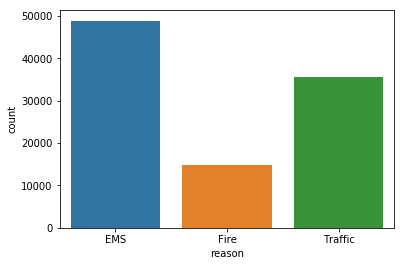

In [23]:
df['reason']= df['title'].apply(lambda s:s.split(':')[0])
df['reason'].value_counts()
sns.countplot(x='reason',data=df)

**Next, I will do a couple of things on "timeStamp" to find out that whether people would make more 911 calls in a particular time of a year.**

** Time information Cleaning up **

In [24]:
type('timeStamp') 
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['Hour'] = df['timeStamp'].apply(lambda t : t.hour)
df['Month']= df['timeStamp'].apply(lambda t : t.month)
df['Week'] = df['timeStamp'].apply(lambda t : t.weekday())
df['Week'] = df['Week'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

** We start from days of week. Let's see 911 calls in different days of week for different reasons. 
There were fewer 911 calls on weekends compared to weekdays.
There were the largest number of calls on Friday for EMS and on Tuesday for traffic. For fire, the number basically remained constant.
**

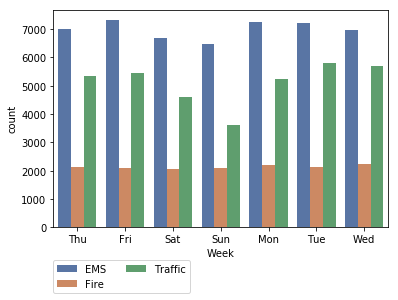

In [25]:
sns.countplot(x='Week',hue='reason',data=df, palette='deep')
plt.legend(bbox_to_anchor=(0, -0.15, 1, 0), loc=2, ncol=2, borderaxespad=0)

** Now get the monthly data, apperently, viewing from a distributed aspect, the information of September, October and November is omitted. So, we should turn to other methods. **

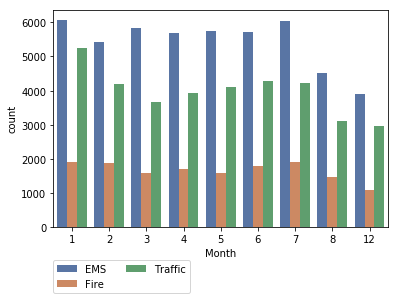

In [26]:
sns.countplot(x='Month',hue='reason',data=df,palette='deep')
plt.legend(bbox_to_anchor=(0, -0.15, 1, 0), loc=2, ncol=2, borderaxespad=0)

** This graph shows the monthly trend of 911 calls. In the beginning of the year(January), the number of 911 calls was the largest. It gradually decreased till March, and then increased again. In July, it reached the peak before drastically decreased in August. There were no information in September, October and November. Finally, in December, the number was the smallest in the whole year.**

Text(0.5,1,'911 Calls per month')

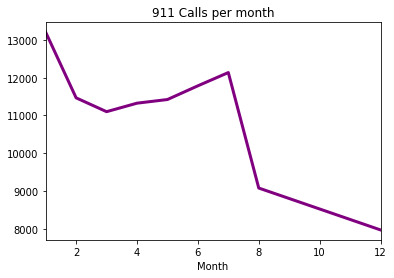

In [27]:
byMonth = df.groupby('Month').count()
byMonth['lat'].plot(lw='3', color='purple')
plt.title('911 Calls per month')

**From this graph, you can see the exact data points, and the overall trend of the calls.**

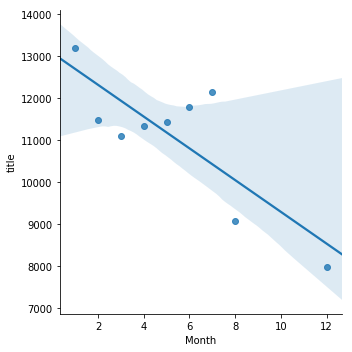

In [30]:
byMonth = byMonth.reset_index()
sns.lmplot(x='Month',y='title',data=byMonth)
plt.set_ylabel='numbers of calls'

** Then we take a look at the numbers of 911 calls on each day. ** 

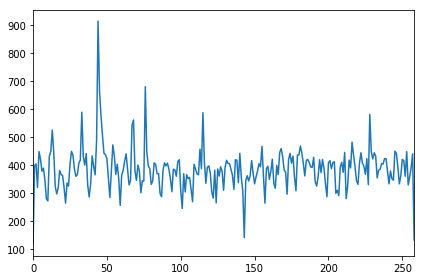

In [44]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())
byDate = df.groupby('Date').count()
byDate = byDate.reset_index()
byDate['title'].plot()
plt.tight_layout()

** Generally speaking, the distribution of 911 calls is quite regular, except for a very large number on a day in Janurary 2016. Now create 3 separate plots with each plot representing a reason for the 911 call. **

In [45]:
Traffic = df[df['reason']=='Traffic']
byDate1 = Traffic.groupby('Date').count()
byDate1['Date'] = byDate.index
EMS = df[df['reason']=='EMS']
byDate2 = EMS.groupby('Date').count()
byDate2['Date'] = byDate.index
Fire = df[df['reason']=='Fire']
byDate3 = Fire.groupby('Date').count()
byDate3['Date'] = byDate.index

** For Traffic**

Text(0.5,1,'Traffic')

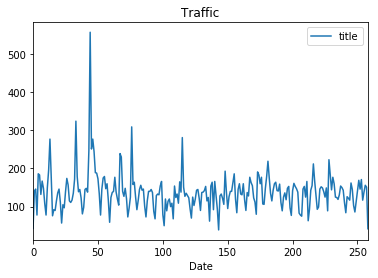

In [46]:
byDate1.plot.line(x='Date',y='title')
plt.title('Traffic')

** For EMS**

Text(0.5,1,'EMS')

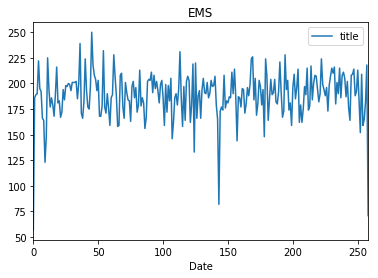

In [47]:
byDate2.plot.line(x='Date',y='title')
plt.title('EMS')

** For Fire **

Text(0.5,1,'Fire')

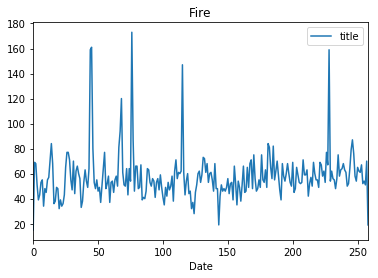

In [48]:
byDate3.plot.line(x='Date',y='title')
plt.title('Fire')

In [49]:
df[['Hour','Week']].unstack(level=0)
dayHour = df.groupby(by=['Week','Hour']).count()['reason'].unstack()

** Finally, I want to find out in what time of a day will have a larger number of 911 calls. I create two heatmaps to show the level, brighter color means more calls.**

** This graph shows the number of 911 calls in hours based on different days of week.**

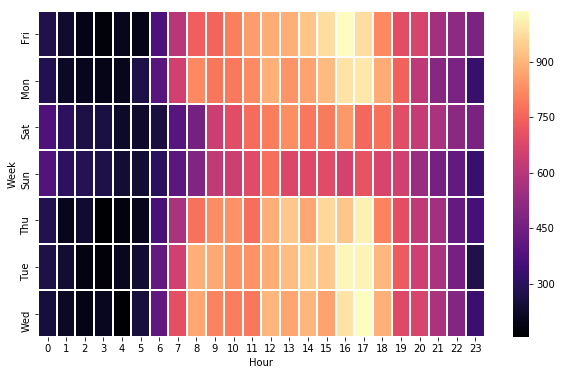

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(dayHour,linecolor='white',linewidths=1,cmap='magma')

** This graph shows the number of 911 calls in hours based on different months **

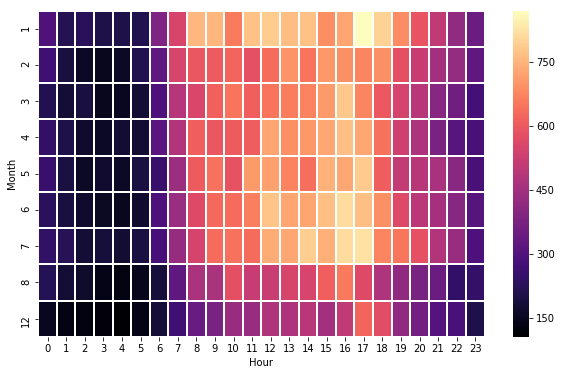

In [54]:
dayMonth = df.groupby(by=['Month','Hour']).count()['reason'].unstack()
plt.figure(figsize=(10,6))
sns.heatmap(dayMonth, linecolor='white',linewidths=1,cmap='magma')

** Obviously, there are much more calls happening during daytime rather than at midnight or early in the morning.**